<a href="https://colab.research.google.com/github/mugaso/Data-Science-1/blob/main/Proyecto_clase/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**

## Primera entrega - Visualizaciones y entendimiento

Para este proyecto usaremos información de 2 años de las 15 acciones las transadas de la bolsa de valores de Colombia. (Ecopetrol, ISA, Cementos Argos, Grupo Cibest, Grupo Argos, Grupo Sura, Grupo Energia Bogota, Celsia, CorfiColombiana, Conconcreto, Banco de Bogotá, Almacenes Exito, Grupo Bolivar, Terpel y Promigas)

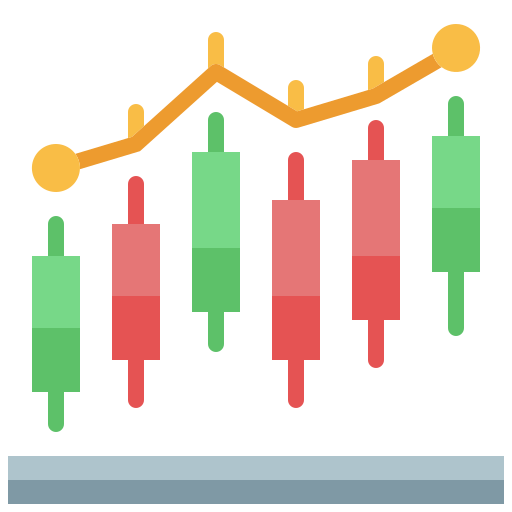

*Objetivo*

Crear un portafolio de acciones que maxime la rentabilidad y mínimice el riesgo, para esto analizaremos cada acción y la combinación mas adecuada.
Posterior a la creación del portafolio buscaremos la rentabilidad esperada con una confianza del 95%.

*Preguntas*

1. ¿El portafolio mas óptima sera de una sola acción?
2. ¿De acuerdo con los resultados de la bolsa de valores colombiana se esperan resultados positos del portafolio creado?


In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
url_acciones = "https://raw.githubusercontent.com/mugaso/Data-Science-1/refs/heads/main/Proyecto_clase/Storage/Resumen.csv"

In [46]:
precio_acciones = pd.read_csv(url_acciones, sep=";")

In [47]:
precio_acciones.info()
precio_acciones.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   246 non-null    object 
 1   IMI     246 non-null    object 
 2   BIC     246 non-null    object 
 3   BBO     246 non-null    float64
 4   CEL     246 non-null    object 
 5   CCB     246 non-null    object 
 6   CFV     246 non-null    object 
 7   CIC     246 non-null    float64
 8   EC      246 non-null    object 
 9   ARG     246 non-null    object 
 10  SCA     246 non-null    object 
 11  GEB     246 non-null    object 
 12  ISA     246 non-null    object 
 13  TPL     246 non-null    object 
 14  PMG     246 non-null    object 
 15  SIS     246 non-null    object 
dtypes: float64(2), object(14)
memory usage: 33.4+ KB


,Fecha,IMI,BIC,BBO,CEL,CCB,CFV,CIC,EC,ARG,SCA,GEB,ISA,TPL,PMG,SIS
0,13.06.2025,"2.820,00","49.940,00",32200.0,"4.490,00","10.600,00","17.400,00",489.0,"1.985,00","21.580,00","69.800,00","2.910,00","19.200,00","12.360,00","6.800,00","45.700,00"
1,12.06.2025,"2.840,00","50.000,00",32500.0,"4.505,00","10.560,00","17.900,00",500.0,"1.925,00","21.960,00","70.400,00","2.920,00","19.000,00","12.400,00","6.800,00","45.540,00"
2,11.06.2025,"2.830,00","50.500,00",32580.0,"4.550,00","10.700,00","18.100,00",488.0,"1.930,00","21.960,00","69.920,00","2.920,00","19.500,00","12.260,00","6.780,00","45.400,00"
3,10.06.2025,"2.795,00","50.300,00",32000.0,"4.560,00","10.680,00","18.380,00",489.0,"1.895,00","21.800,00","69.920,00","2.940,00","19.380,00","12.280,00","6.760,00","45.140,00"
4,09.06.2025,"2.800,00","49.560,00",32500.0,"4.420,00","10.520,00","18.280,00",484.0,"1.850,00","21.880,00","69.980,00","2.930,00","19.500,00","12.300,00","6.760,00","44.440,00"


In [48]:
nombre_empresas = {
    "IMI": "Almacenes Exito",
    "BIC": "Grupo Cibest",
    "BBO": "Banco de Bogota",
    "CEL": "Celsia",
    "CCB": "Cemargos",
    "CFV": "Corficolombiana",
    "CIC": "Conconcreto",
    "EC": "Ecopetrol",
    "ARG": "Grupo Argos",
    "SCA": "Grupo Bolivar",
    "GEB": "Energia Bogota",
    "ISA": "Internexa",
    "TPL": "Terpel",
    "PMG": "Promigas",
    "SIS": "Grupo Sura"
}

In [49]:
precio_acciones.columns

Index(['Fecha', 'IMI', 'BIC', 'BBO', 'CEL', 'CCB', 'CFV', 'CIC', 'EC', 'ARG',
       'SCA', 'GEB', 'ISA', 'TPL', 'PMG', 'SIS'],
      dtype='object')

In [50]:
precio_acciones.rename(columns=nombre_empresas, inplace=True)

In [51]:
precio_acciones.columns

Index(['Fecha', 'Almacenes Exito', 'Grupo Cibest', 'Banco de Bogota', 'Celsia',
       'Cemargos', 'Corficolombiana', 'Conconcreto', 'Ecopetrol',
       'Grupo Argos', 'Grupo Bolivar', 'Energia Bogota', 'Internexa', 'Terpel',
       'Promigas', 'Grupo Sura'],
      dtype='object')

In [54]:
precio_acciones["Fecha"] = pd.to_datetime(precio_acciones["Fecha"], format="%d.%m.%Y", errors= "coerce")
precio_acciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            246 non-null    datetime64[ns]
 1   Almacenes Exito  246 non-null    object        
 2   Grupo Cibest     246 non-null    object        
 3   Banco de Bogota  246 non-null    float64       
 4   Celsia           246 non-null    object        
 5   Cemargos         246 non-null    object        
 6   Corficolombiana  246 non-null    object        
 7   Conconcreto      246 non-null    float64       
 8   Ecopetrol        246 non-null    object        
 9   Grupo Argos      246 non-null    object        
 10  Grupo Bolivar    246 non-null    object        
 11  Energia Bogota   246 non-null    object        
 12  Internexa        246 non-null    object        
 13  Terpel           246 non-null    object        
 14  Promigas         246 non-null    object   

In [60]:
precio_acciones_fragmentada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990 entries, 245 to 3457
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         3690 non-null   datetime64[ns]
 1   Stock         3990 non-null   object        
 2   Price         3690 non-null   float64       
 3   Daily_Change  3975 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 155.9+ KB


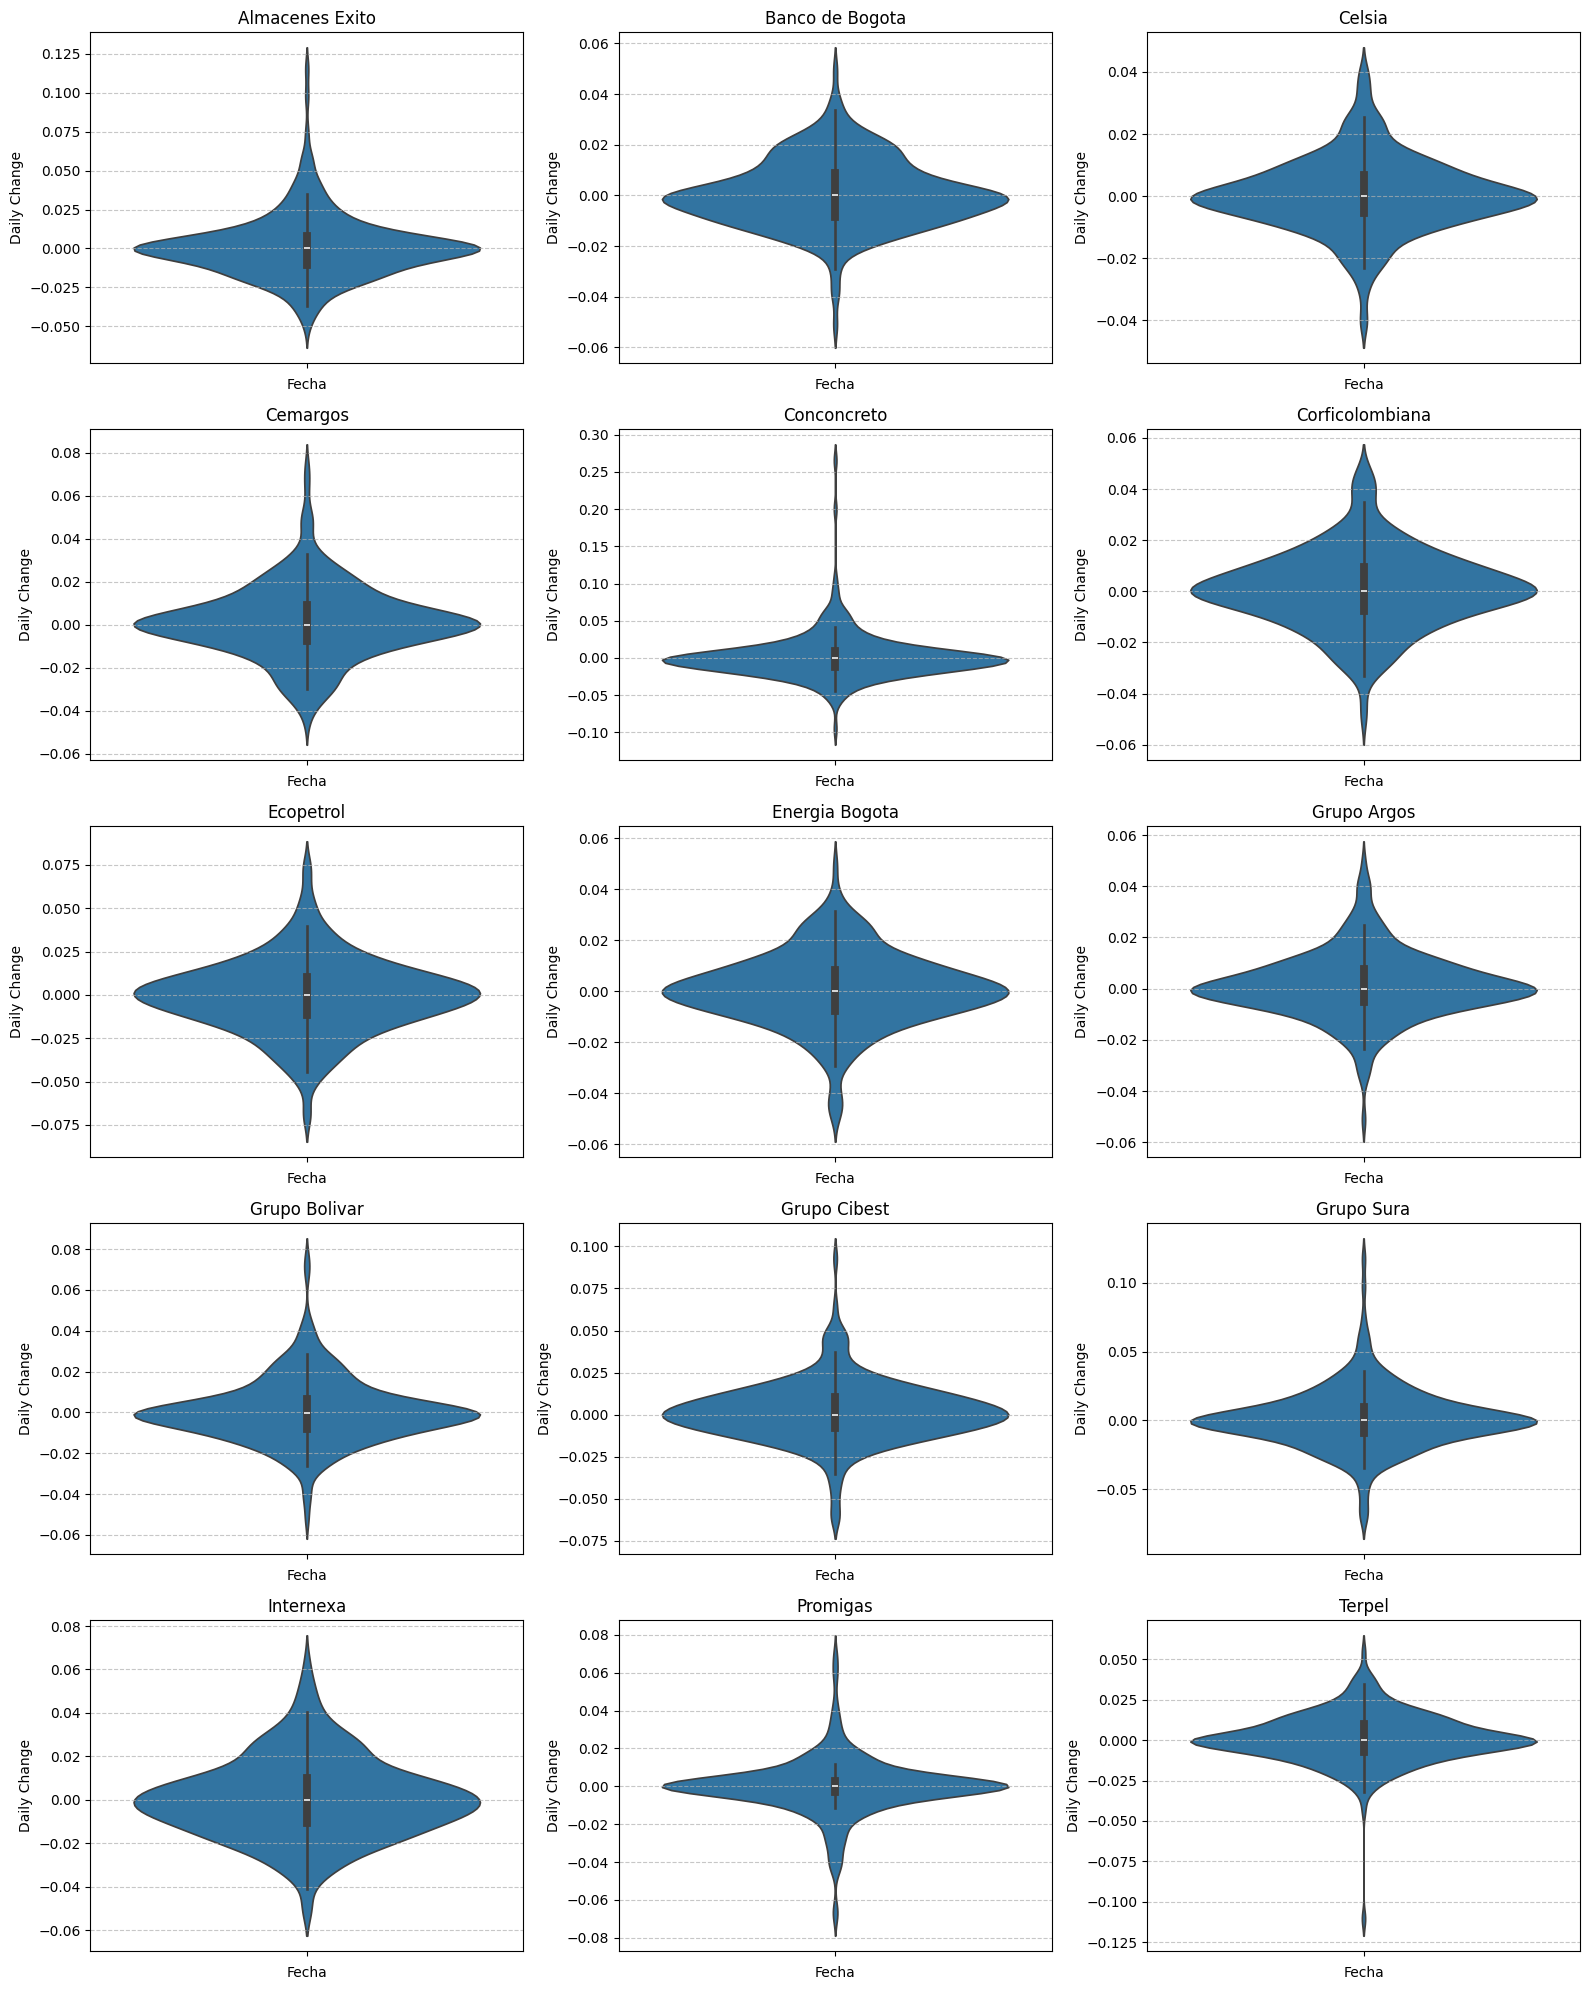

In [73]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    stock_data = precio_acciones_cleaned[precio_acciones_cleaned['Stock'] == stock]
    sns.violinplot(data=stock_data, y="Daily_Change", ax=axes[i]) # Use ax parameter to specify the subplot
    axes[i].set_title(stock)
    axes[i].set_xlabel("Fecha") # Note: Violin plot doesn't have x-axis as date in this case
    axes[i].set_ylabel("Daily Change")
    axes[i].grid(axis = "y", linestyle ="--", alpha = 0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()